In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns # data visualization
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train = pd.read_csv("..\\data\\titanic_train.csv")
test = pd.read_csv("..\\data\\titanic_test.csv")
all_df = pd.concat([train,test])
full_data = [train, test]
PassengerId =  test['PassengerId']

In [3]:
train.head(3)
train.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing Value

In [4]:
train.isnull().sum(axis=0).reset_index()
test.isnull().sum(axis=0).reset_index()

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


,index,0
0,PassengerId,0
1,Pclass,0
2,Name,0
3,Sex,0
4,Age,86
5,SibSp,0
6,Parch,0
7,Ticket,0
8,Fare,1
9,Cabin,327


#### Embarked has 2 missing in train
Passenger class and fare might be relevent to Embark. They are all in class 1 with Fare = 80

In [5]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The median Fare for class 1 of Embarked  C is near 80, assign Embarked C to those two missing row

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:450: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 300)

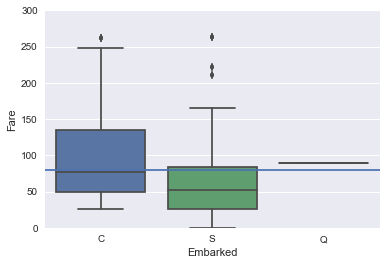

In [6]:
sns.boxplot(x = "Embarked", y = "Fare", data = all_df[ (all_df["Pclass"] == 1)])
plt.axhline(80)
plt.ylim(0,300)

In [4]:
train.loc[train["Embarked"].isnull(),"Embarked"] = "C"
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Fare has 1 missing in test

In [8]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:478: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(0, 300)

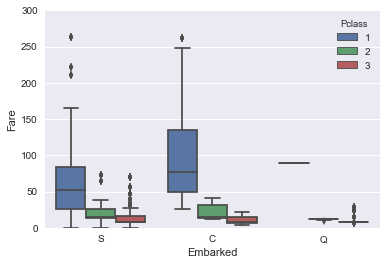

In [9]:
sns.boxplot(x = "Embarked", y = "Fare", hue = "Pclass", data = all_df)
plt.ylim(0,300)

Fare is related to Pclass and Embarked. Assign the median fare of Embarked S in class 3 to this missing value

In [5]:
test.loc[test["Fare"].isnull(),"Fare"] = all_df[(all_df["Embarked"] == "S") & (all_df["Pclass"] == 3)]["Fare"].median()
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Age has 177 missing in train and 86 in test

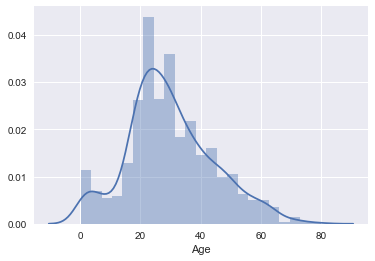

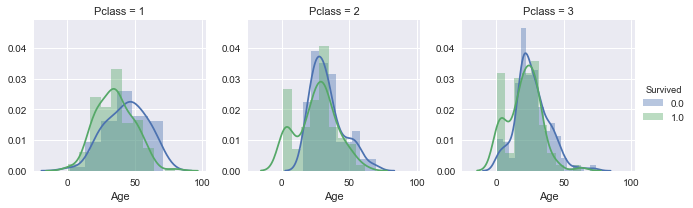

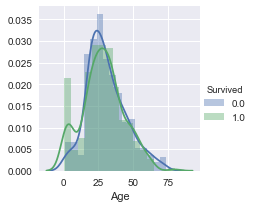

In [11]:
sns.distplot(all_df[all_df["Age"].notnull()]["Age"],hist = True)
g = sns.FacetGrid(all_df[all_df["Age"].notnull()], col="Pclass", hue = "Survived")
g = g.map(sns.distplot, "Age", hist = True).add_legend()

g = sns.FacetGrid(all_df[all_df["Age"].notnull()], hue = "Survived")
g = g.map(sns.distplot, "Age", hist = True).add_legend()

The ANOVA test demonstrated that there are significnat difference between age in each class

In [12]:
import scipy.stats as stats

class1 = all_df[(all_df["Pclass"] == 1) & (all_df["Age"].notnull())]["Age"]
class2 = all_df[(all_df["Pclass"] == 2) & (all_df["Age"].notnull())]["Age"]
class3 = all_df[(all_df["Pclass"] == 3) & (all_df["Age"].notnull())]["Age"]

# Perform the ANOVA
stats.f_oneway(class1,class2,class3)

F_onewayResult(statistic=108.32631005902482, pvalue=1.7967083683287821e-43)

Generate random numbers for age between mean and standard deviation in each class 

In [6]:
for i in [1,2,3]:
    age_avg = all_df[(all_df["Pclass"] == i) & (all_df["Age"].notnull())]["Age"].mean()
    age_std = all_df[(all_df["Pclass"] == i) & (all_df["Age"].notnull())]["Age"].std()
    for dataset in full_data:
        age_null_count = dataset[dataset["Pclass"] == i]["Age"].isnull().sum()
        age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
        dataset.loc[(dataset["Pclass"] == i) & (dataset["Age"].isnull()), "Age"] = age_null_random_list

dataset['Age'] = dataset['Age'].astype(int)

#### Cabin has 687 missing in train and 327 in test. Too much missing value, will not use it in the model

## Feature Engeneering

In [7]:
for dataset in full_data:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    dataset["IsAlone"] = dataset["FamilySize"].apply(lambda x: 1 if x ==1 else 0)
    dataset["Sex"] = dataset["Sex"].apply(lambda x: 0 if x == "female" else 1)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(7.91, 14.454]","(16.0, 32.0]"


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FareBin,AgeBin
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,Q,1,1,"(-0.001, 7.896]","(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,NaN,S,2,0,"(-0.001, 7.896]","(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,NaN,Q,1,1,"(7.896, 14.454]","(60.8, 76.0]"


In [8]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch']
train = train.drop(drop_elements, axis = 1)
test = test.drop(drop_elements,axis = 1)
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first = True)
train.head(3)

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,"FareBin_(7.91, 14.454]","FareBin_(14.454, 31.0]","FareBin_(31.0, 512.329]","AgeBin_(16.0, 32.0]","AgeBin_(32.0, 48.0]","AgeBin_(48.0, 64.0]","AgeBin_(64.0, 80.0]"
0,0,3,1,22.0,7.2500,2,0,0,1,0,0,0,1,0,0,0
1,1,1,0,38.0,71.2833,2,0,0,0,0,0,1,0,1,0,0
2,1,3,0,26.0,7.9250,1,1,0,1,1,0,0,1,0,0,0


In [9]:
y_train = train.loc[:,"Survived"]
x_train = train.drop(['Survived'], axis=1) # Creates an array of the train data
x_test = test # Creats an array of the test data

## Generating Base First-Level Models

In [10]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
import xgboost as xgb
from sklearn.svm import SVC

C:\Users\yiqin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

In [12]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        imp = pd.DataFrame( 
        self.clf.fit(x,y).feature_importances_, 
        columns = [ 'Importance' ] , 
        index = x.columns 
        )
        imp = imp.sort_values( [ 'Importance' ] , ascending = True )
        imp.plot( kind = 'barh' )
        print(imp)

In [95]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }


rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [96]:
rf.train(x_train,y_train)
rf_oof_train = rf.predict(x_train)
rf_oof_test = rf.predict(x_test)

gb.train(x_train,y_train)
gb_oof_train = gb.predict(x_train)
gb_oof_test = gb.predict(x_test)

svc.train(x_train,y_train)
svc_oof_train = svc.predict(x_train)
svc_oof_test = svc.predict(x_test)

C:\Users\yiqin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


                         Importance
AgeBin_(64.0, 80.0]        0.003313
AgeBin_(48.0, 64.0]        0.005845
Embarked_Q                 0.009038
FareBin_(7.91, 14.454]     0.009538
AgeBin_(32.0, 48.0]        0.009625
AgeBin_(16.0, 32.0]        0.011643
FareBin_(14.454, 31.0]     0.013387
IsAlone                    0.021319
Embarked_S                 0.022958
FareBin_(31.0, 512.329]    0.031124
FamilySize                 0.074233
Age                        0.106405
Pclass                     0.120244
Fare                       0.161726
Sex                        0.399603


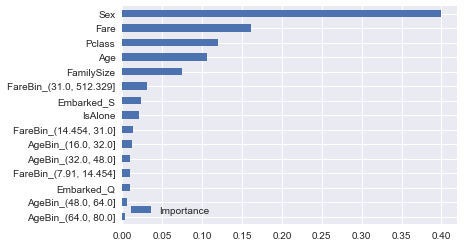

In [22]:
rf_feature = rf.feature_importances(x_train,y_train)

                         Importance
AgeBin_(64.0, 80.0]        0.001250
FareBin_(31.0, 512.329]    0.001806
AgeBin_(48.0, 64.0]        0.002199
Embarked_Q                 0.004382
AgeBin_(32.0, 48.0]        0.006009
IsAlone                    0.009505
FareBin_(14.454, 31.0]     0.012893
AgeBin_(16.0, 32.0]        0.017563
Embarked_S                 0.021235
Pclass                     0.034985
FamilySize                 0.035092
FareBin_(7.91, 14.454]     0.035190
Sex                        0.040886
Age                        0.362603
Fare                       0.414400


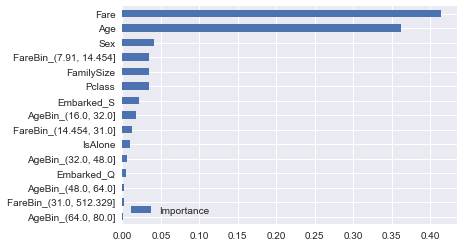

In [23]:
gb_feature = gb.feature_importances(x_train,y_train)

In [97]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'SVC': svc_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head(3)

base_predictions_test = pd.DataFrame( {'RandomForest': rf_oof_test.ravel(),
     'SVC': svc_oof_test.ravel(),
      'GradientBoost': gb_oof_test.ravel()
    })
base_predictions_test.head(3)

,GradientBoost,RandomForest,SVC
0,0,0,0
1,1,1,1
2,1,0,1


,GradientBoost,RandomForest,SVC
0,0,0,0
1,0,0,1
2,0,0,0


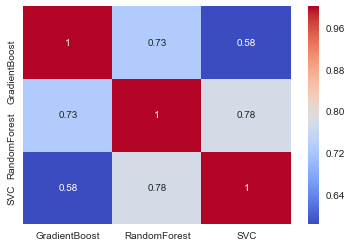

In [25]:
sns.heatmap(base_predictions_train.corr(),cmap='coolwarm',annot=True)

## Second level learning model via XGBoost

In [26]:
xgb_params = {
    #'eta': 0.05,
    'max_depth': 8,
    'min_child_weight': 2,
    'subsample': 0.8,
    'gamma': 0.9,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'scale_pos_weight':1,
    'nthread': -1,
    'silent': 1
}

dtrain = xgb.DMatrix(base_predictions_train, y_train, feature_names= base_predictions_train.columns.values)
xgb_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 10)

dtest = xgb.DMatrix(base_predictions_test)
pred_test = xgb_model.predict(dtest)
pred_train = xgb_model.predict(dtrain)

pred_test[0:5]
pred_train[0:5]

array([ 0.04029499,  0.04029499,  0.04029499,  0.95256698,  0.96615779], dtype=float32)

array([ 0.04029499,  0.96615779,  0.95256698,  0.96615779,  0.04029499], dtype=float32)

In [27]:
pred_test[pred_test >= 0.5] = 1
pred_test[pred_test < 0.5] = 0
pred_train[pred_train >= 0.5] = 1
pred_train[pred_train < 0.5] = 0
pred_test[0:5]
pred_train[0:5]

array([ 0.,  0.,  0.,  1.,  1.], dtype=float32)

array([ 0.,  1.,  1.,  1.,  0.], dtype=float32)

In [28]:
pred_train_df = pd.DataFrame({'Survived': y_train.values,'predicted': pred_train})
pred_train_df.head(3)

,Survived,predicted
0,0,0.0
1,1,1.0
2,1,1.0


In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'False Positive Rate or (1 - Specifity)')

Text(0,0.5,'True Positive Rate or (Sensitivity)')

Text(0.5,1,'Receiver Operating Characteristic')

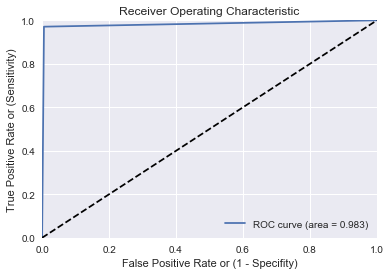

In [30]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(pred_train_df['Survived'], pred_train_df['predicted'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(pred_train_df['Survived'], pred_train_df['predicted']))
print(classification_report(pred_train_df['Survived'], pred_train_df['predicted']))

[[546   3]
 [ 10 332]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       549
          1       0.99      0.97      0.98       342

avg / total       0.99      0.99      0.99       891



## Submit

In [37]:
# Generate Submission File 
submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': pred_test})
submission["Survived"] = submission["Survived"].astype('int')
submission.head(3)

submission.to_csv("../data/titanic_submission.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [48]:
submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': base_predictions_test.iloc[:,1]})
submission["Survived"] = submission["Survived"].astype('int')
submission.head(3)


submission.to_csv("../data/titanic_submission_rf.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


## ?????

Now as alluded to above in the introductory section, stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [13]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,)) ##
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):#get the train and test index generated by Kfold
        x_tr = x_train.iloc[train_index] #xtrain for a fold
        y_tr = y_train.iloc[train_index] #ytrain for a fold
        x_te = x_train.iloc[test_index]  #xtest for a fold

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te) #includes predicted value for test in fold, loop fold will contain all train data
        #oof_test_skf[i, :] = clf.predict(x_test)  #includes predicted value for true test set

    clf.train(x_train,y_train)
    oof_test = clf.predict(x_test)
    #oof_test[:] = oof_test_skf.mean(axis=0) #includes mean predicted value for true test set based on 5 fold model
    #oof_test[:] = oof_test_skf.mode(axis=0) #why not mode
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [14]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }


rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

C:\Users\yiqin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [15]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'SVC': svc_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head(3)

base_predictions_test = pd.DataFrame( {'RandomForest': rf_oof_test.ravel(),
     'SVC': svc_oof_test.ravel(),
      'GradientBoost': gb_oof_test.ravel()
    })
base_predictions_test.head(3)

,GradientBoost,RandomForest,SVC
0,0.0,0.0,0.0
1,1.0,1.0,1.0
2,0.0,0.0,1.0


,GradientBoost,RandomForest,SVC
0,0,0,0
1,0,0,1
2,0,0,0


[0]	train-error:0.195848	test-error:0.213243
[5]	train-error:0.142537	test-error:0.157127
[10]	train-error:0.144781	test-error:0.144781
[15]	train-error:0.144781	test-error:0.144781
[20]	train-error:0.142537	test-error:0.157127
[25]	train-error:0.142537	test-error:0.157127
[30]	train-error:0.141414	test-error:0.159371
[35]	train-error:0.141975	test-error:0.158249
[40]	train-error:0.141975	test-error:0.158249
[45]	train-error:0.141414	test-error:0.159371
[50]	train-error:0.141414	test-error:0.159371
[55]	train-error:0.141414	test-error:0.159371


9

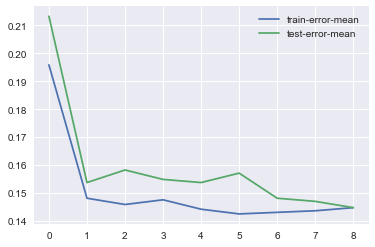

In [16]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'min_child_weight': 2,
    'subsample': 0.8,
    'gamma': 0.9,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'scale_pos_weight':1,
    'nthread': -1,
    'silent': 1
}

dtrain = xgb.DMatrix(base_predictions_train, y_train, feature_names= base_predictions_train.columns.values)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=50,
    verbose_eval=5, show_stdv=False)

cv_output[['train-error-mean', 'test-error-mean']].plot()
num_boost_rounds = len(cv_output)
num_boost_rounds



In [21]:
xgb_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 6)

dtest = xgb.DMatrix(base_predictions_test)
pred_test = xgb_model.predict(dtest)
pred_train = xgb_model.predict(dtrain)

pred_test[0:5]
pred_train[0:5]

array([ 0.40284735,  0.47039369,  0.40284735,  0.47164127,  0.53748429], dtype=float32)

array([ 0.40284735,  0.59645015,  0.47039369,  0.59645015,  0.40284735], dtype=float32)

In [22]:
pred_test[pred_test >= 0.5] = 1
pred_test[pred_test < 0.5] = 0
pred_train[pred_train >= 0.5] = 1
pred_train[pred_train < 0.5] = 0
pred_test[0:5]
pred_train[0:5]

pred_train_df = pd.DataFrame({'Survived': y_train.values,'predicted': pred_train})
pred_train_df.head(3)

array([ 0.,  0.,  0.,  0.,  1.], dtype=float32)

array([ 0.,  1.,  0.,  1.,  0.], dtype=float32)

,Survived,predicted
0,0,0.0
1,1,1.0
2,1,0.0


In [23]:
# Generate Submission File 
submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': pred_test})
submission["Survived"] = submission["Survived"].astype('int')
submission.head(3)

submission.to_csv("../data/titanic_submission_cv.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


## direct use xgboost

In [72]:
x_train.columns.values
feature_name = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone',
       'Embarked_Q', 'Embarked_S', 'FareBin1',
       'FareBin2', 'FareBin3',
       'AgeBin1', 'AgeBin2', 'AgeBin3',
       'AgeBin4']

array(['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone',
       'Embarked_Q', 'Embarked_S', 'FareBin_(7.91, 14.454]',
       'FareBin_(14.454, 31.0]', 'FareBin_(31.0, 512.329]',
       'AgeBin_(16.0, 32.0]', 'AgeBin_(32.0, 48.0]', 'AgeBin_(48.0, 64.0]',
       'AgeBin_(64.0, 80.0]'], dtype=object)

[0]	train-error:0.167228	test-error:0.204265
[50]	train-error:0.136925	test-error:0.189674
[100]	train-error:0.117284	test-error:0.186307
[150]	train-error:0.112795	test-error:0.18294
[200]	train-error:0.103816	test-error:0.176206
[250]	train-error:0.096521	test-error:0.171717
[300]	train-error:0.089787	test-error:0.173962
[350]	train-error:0.090348	test-error:0.171717
[400]	train-error:0.0858587	test-error:0.171717
[450]	train-error:0.0819307	test-error:0.169472
[500]	train-error:0.0808083	test-error:0.171717
[550]	train-error:0.079686	test-error:0.16835
[600]	train-error:0.0757577	test-error:0.171717
[650]	train-error:0.076319	test-error:0.172839
[700]	train-error:0.0740743	test-error:0.175084
[750]	train-error:0.0712683	test-error:0.176206
[800]	train-error:0.0707073	test-error:0.176206
[850]	train-error:0.0712687	test-error:0.176206
[900]	train-error:0.069585	test-error:0.177329
[950]	train-error:0.066218	test-error:0.176206


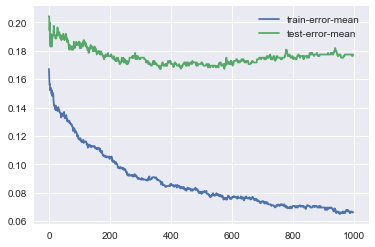

In [80]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'min_child_weight': 2,
    'subsample': 0.8,
    'gamma': 0.9,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'scale_pos_weight':1,
    'nthread': -1,
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train, feature_names= feature_name)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=1000,
    verbose_eval=50, show_stdv=False)

cv_output[['train-error-mean', 'test-error-mean']].plot()

In [85]:
xgb_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 300)

dtest = xgb.DMatrix(x_test,feature_names=feature_name)
pred_test = xgb_model.predict(dtest)
pred_train = xgb_model.predict(dtrain)

pred_test[0:5]
pred_train[0:5]

array([ 0.09558858,  0.12949176,  0.07775851,  0.19115315,  0.4246695 ], dtype=float32)

array([ 0.11737289,  0.98225683,  0.59143376,  0.99351805,  0.21408805], dtype=float32)

In [86]:
pred_test[pred_test >= 0.5] = 1
pred_test[pred_test < 0.5] = 0
pred_train[pred_train >= 0.5] = 1
pred_train[pred_train < 0.5] = 0
pred_test[0:5]
pred_train[0:5]

pred_train_df = pd.DataFrame({'Survived': y_train.values,'predicted': pred_train})
pred_train_df.head(3)

array([ 0.,  0.,  0.,  0.,  0.], dtype=float32)

array([ 0.,  1.,  1.,  1.,  0.], dtype=float32)

,Survived,predicted
0,0,0.0
1,1,1.0
2,1,1.0


In [90]:
# Generate Submission File 
submission_xgb = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': pred_test})
submission_xgb["Survived"] = submission_xgb["Survived"].astype('int')
submission_xgb.head(3)

submission_xgb.to_csv("../data/titanic_submission_xgb.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [98]:
base_predictions_test["xgb"] = submission_xgb["Survived"]
base_predictions_test.head()

,GradientBoost,RandomForest,SVC,xgb
0,0,0,0,0
1,0,0,1,0
2,0,0,0,0
3,1,0,0,0
4,1,1,1,0


In [112]:
submission_vote = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': base_predictions_test.mode(axis=1)[0].values})
submission_vote["Survived"] = submission_vote["Survived"].astype('int64')
submission_vote.head(3)

submission_vote.to_csv("../data/titanic_submission_vote.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
